<img src='1.jpeg'>

### This notebook has the following sections and subsections :

**Machine learning is breaking grounds in numerous fields including <font color=red>Finance</font>. What if we could use Machine Learning models to identify incomes of individuals ?**

# Promblem Statement :
### Adult Income Dataset :
<ul>
<li>The Adult dataset is from the Census Bureau and the task is to <font color=pink>predict whether a given adult makes more than 50,000</font> a year based attributes such as education, hours of work per week, etc..
<li>The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..
<ul>
<li>Age
<li>Workclass
<li>Final Weight
<li>Education
<li>Education Number of Years
<li>Marital-status
<li>Occupation
<li>Relationship
<li>Race
<li>Sex
<li>Capital-gain
<li>Capital-loss
<li>Hours-per-week
<li>Native-country
</ul>
<li>There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a <font color=yellow>binary classification</font> task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.
<li>The dataset contains missing values that are marked with a question mark character (?).


# Importing Libraries
**let’s start by importing some of the required libraries/modules**

In [1]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading The Data Set

In [2]:
df = pd.read_csv('adult.csv', na_values=["?"])

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploratory Data Analysis and Data Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<ul>
Observations 
<li>There are 48842 samples in the dataset
<li>There are both categorical and numerical columns in the dataset
<li>The columns workClass, occupation, native-country have missing values

<h4>Missing Values</h4>

In [5]:
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

All three columns having missing are categorical columns.Several predictive supervise models like KNN or other methods can be used to predict these values and impute them.It takes much more extra work to estimate values for the missing entries.
Considering the relative low portion of missing data, we discard rows with missing data

In [6]:
df=df.dropna(axis=0)
print('Dimensions:',df.shape)

Dimensions: (45222, 15)


In [7]:
#Checking The Unquie Values
col=df.columns
data_type=df.dtypes
uniq=df.nunique()

print("\n%30s  %10s   %10s\n " % ("Column Name", "Data Type", "Unique Values"))
for i in range(len(df.columns)):
    print("%30s  %10s   %10s " % (col[i],data_type[i],uniq[i]))

print("\nDimensions:",df.shape[0],'rows and ',df.shape[1],'columns')


                   Column Name   Data Type   Unique Values
 
                           age       int64           74 
                     workclass      object            7 
                        fnlwgt       int64        26741 
                     education      object           16 
               educational-num       int64           16 
                marital-status      object            7 
                    occupation      object           14 
                  relationship      object            6 
                          race      object            5 
                        gender      object            2 
                  capital-gain       int64          121 
                  capital-loss       int64           97 
                hours-per-week       int64           96 
                native-country      object           41 
                        income      object            2 

Dimensions: 45222 rows and  15 columns


we see that some column names have special characters in them. It would be better for us to remove them as they may cause issues for our data analysis. We can do this easily using Pandas .rename( ) function as shown below

In [8]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country',
                   'hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

**Before any analysis, let's convert the target column into numerical classes**

In [9]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['income'] = labelEncoder.fit_transform(df['income'])

In [10]:
# descriptive stats for numerical fields
df.describe()

,age,fnlwgt,educational-num,capital gain,capital loss,hours per week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


**fnlwgt** appears to be a highly dispersive. In fact, it is a weight on the Current Population Survey (CPS) files. We will not incorporate fnlwgt in set of predictor variables

In [11]:
# descriptive stats for numerical fields
df.describe(include='object')

,workclass,education,marital,occupation,relationship,race,gender,country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [12]:
# frequency for categorical fields 
category_col =['workclass', 'race', 'education','marital', 'occupation',
               'relationship', 'gender', 'country', 'income'] 
for c in category_col:
    print ('\nFrequency of Categories for varible %s'%c)
    print (df[c].value_counts())
    print(" ")
    print('*_'*50)


Frequency of Categories for varible workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
 
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

Frequency of Categories for varible race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64
 
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

Frequency of Categories for varible education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate        

The field marital status are too detailed. It can be re-categorizing into more general terms. Discretisation will be applied on this field later

We are faced with a classification problem on two classes.

**Are the two classes balanced ?**

In [13]:
print(df["income"].value_counts()[0] / df.shape[0])
print(df["income"].value_counts()[1] / df.shape[0])

0.7521560302507629
0.2478439697492371


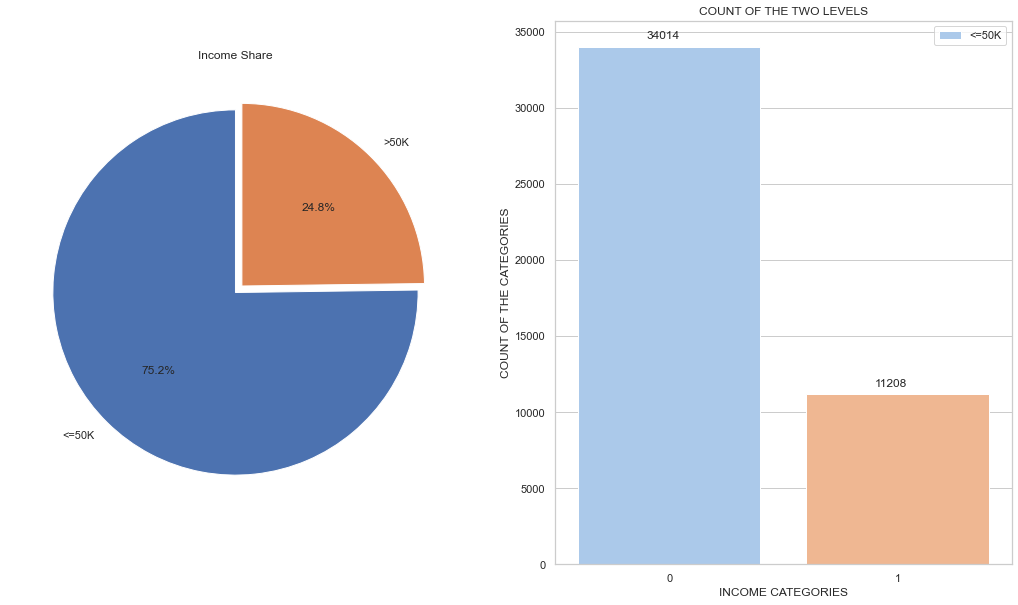

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,10))
#plt.figure(figsize=(7,10))
income1=df['income'].value_counts()
ax[0].pie(income1,explode=(0,0.05),autopct='%1.1f%%',startangle=90,labels=['<=50K','>50K'])
ax[0].set_title('Income Share')
ax[1]=sns.countplot(x='income',data=df,palette='pastel')
ax[1].legend(labels=['<=50K','>50K'])
ax[1].set(xlabel="INCOME CATEGORIES")
ax[1].set(ylabel='COUNT OF THE CATEGORIES')
ax[1].set_title('COUNT OF THE TWO LEVELS')

for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+500))

The two classes are **imbalanced**.The pie chart clearly denotes that more than 50% of the dataset is occupied by one type of observation. This problem is handled using **SMOTE(Synthetic Minority Oversampling Technique)**   or we can use Stratified sampling  in dividing train and test set to preserve the ratio between two classes

In [15]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital gain', 'capital loss',
       'hours per week', 'income'],
      dtype='object')

In [16]:
numeric_col=['age', 'fnlwgt', 'educational-num', 'capital gain', 'capital loss',
       'hours per week']

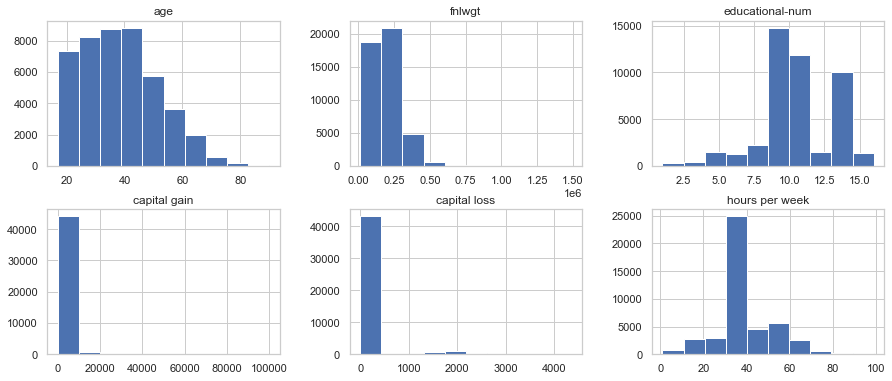

In [17]:
df[numeric_col].hist(figsize=(15, 20), layout=(6, 3));

<ul>
From the histograms above, I can infer the following:

<li>I can group the Age column into bins.
<li>For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.
<li>We need to analyse Education Number further as it might align with Education information.
<li>Final Weight(fnlwgt) is also left skewed.
<li>The Hours per Week can also be split into bins.

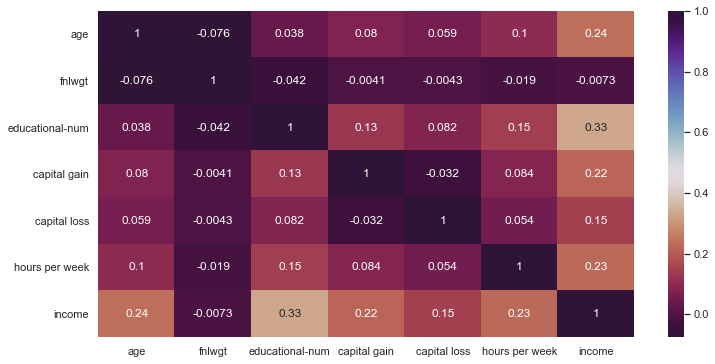

In [18]:
#get correlations of each features in dataset
corrmat =df.corr()
plt.figure(figsize=(12,6))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="twilight_shifted_r")

**Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, I'll drop this column.**

In [19]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

**I'll now analyse the categorical features using CountPlot.**

<h5>Age</h5>

Here, I'll bucket the age into separate bins.
<ul>
<li>0-25: Young
<li>25-50: Adult
<li>50-100: Old

In [20]:
df['age'] = pd.cut(df['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

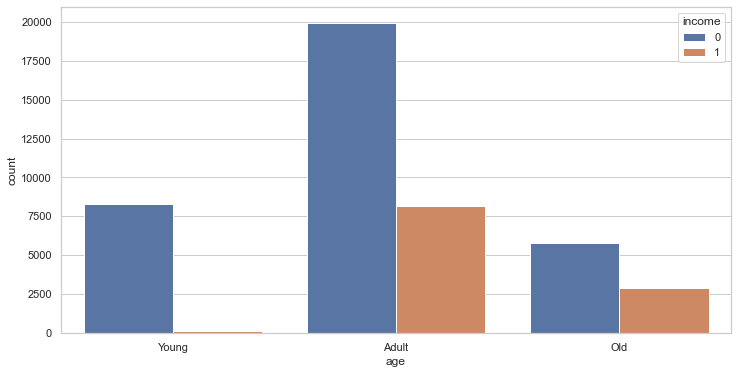

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'age', hue = 'income', data = df);

**It appears that there are relatively less Young people who have an income more than $50K.**

<h5>Capital Gain and Capital Loss</h5>

Rather than having both Capital Gain and Capital Loss, I will use their difference as that is more relevant and gives the change.

In [22]:
df['capital diff'] =df['capital gain'] - df['capital loss']
df.drop(['capital gain'], axis = 1, inplace = True)
df.drop(['capital loss'], axis = 1, inplace = True)

In [23]:
df['capital diff'] = pd.cut(df['capital diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])

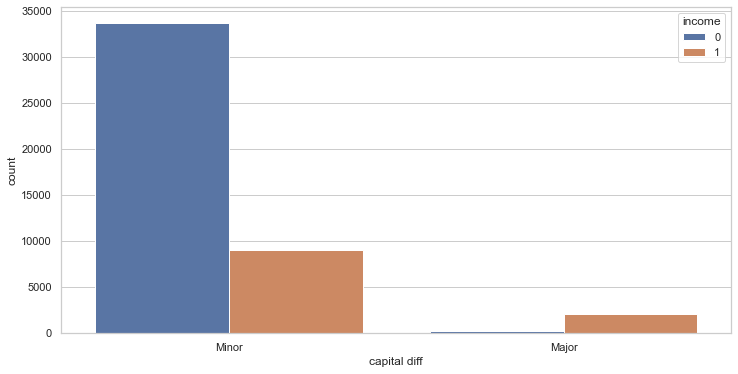

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'capital diff', hue = 'income', data = df);

**On taking a look at the result, I can see that the for Minor there are more people with Income less than 50K and for Major there are more people with Income greater than 50K**

<h5>Hours per Week</h5>
Taking a look at the histogram for Hours per Week, I can see that the dataset is aligned around the center. I can still create buckets from this data. As usually, the work hours are close to 30-40 hours, I create the buckets as 0-30, 30-40, and 40-10

In [25]:
df['hours per week'] = pd.cut(df['hours per week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

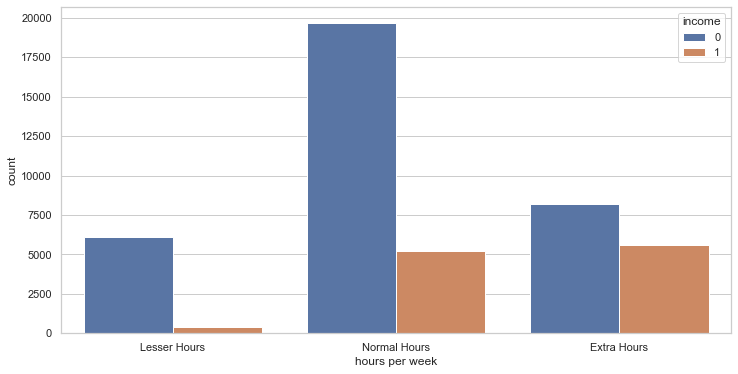

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'hours per week', hue = 'income', data = df);

**Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than 50K increases in comparison to the people earning less**

<h5>Work Class</h5>

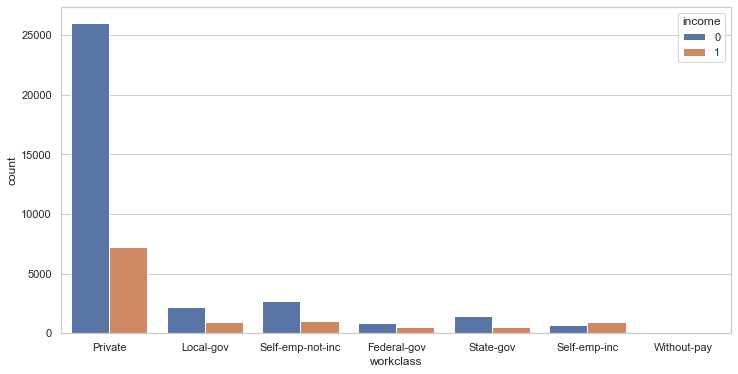

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'workclass', hue = 'income', data = df);

<h5>Education and Education Number</h5>

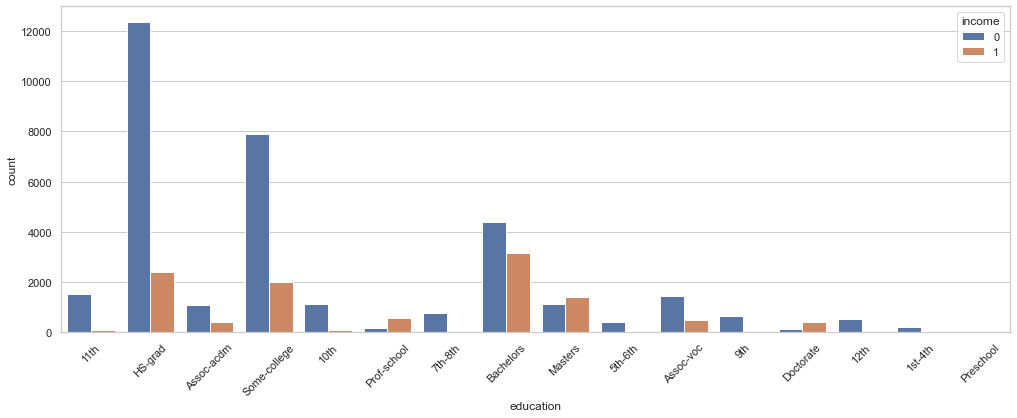

In [28]:
plt.figure(figsize=(17,6))
plt.xticks(rotation = 45)
sns.countplot(x = 'education', hue = 'income', data = df);

In [29]:
#It's a good time to check if there is any relation between Education and Education Number.
education_classes = df['education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, df[df['education'] == edu_class]['educational-num'].unique()))

For 11th, the Education Number is [7]
For HS-grad, the Education Number is [9]
For Assoc-acdm, the Education Number is [12]
For Some-college, the Education Number is [10]
For 10th, the Education Number is [6]
For Prof-school, the Education Number is [15]
For 7th-8th, the Education Number is [4]
For Bachelors, the Education Number is [13]
For Masters, the Education Number is [14]
For 5th-6th, the Education Number is [3]
For Assoc-voc, the Education Number is [11]
For 9th, the Education Number is [5]
For Doctorate, the Education Number is [16]
For 12th, the Education Number is [8]
For 1st-4th, the Education Number is [2]
For Preschool, the Education Number is [1]


**From the analysis above, I discovered that Education Number and Education are just the same. So, I can drop any one column. Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.**

In [30]:
df.drop(['educational-num'], axis = 1, inplace = True)

In [31]:
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'School', inplace = True)
df['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
School           5661
Masters          2514
Assoc-voc        1959
Assoc-acdm       1507
Prof-school       785
Doctorate         544
Name: education, dtype: int64

<h5>Occupation</h5>

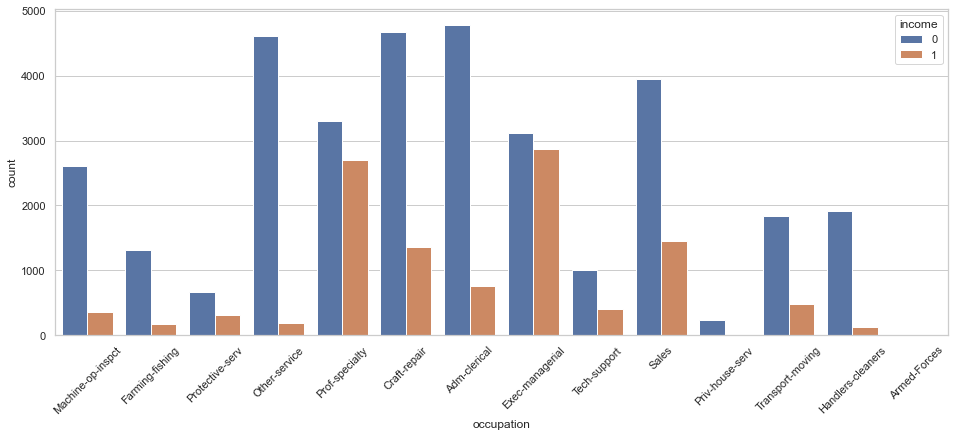

In [32]:
plt.figure(figsize=(16,6))
plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'income', data = df);

 **The categories have already been uniquely defined and we can keep it as is.**

<h5>Race</h5>

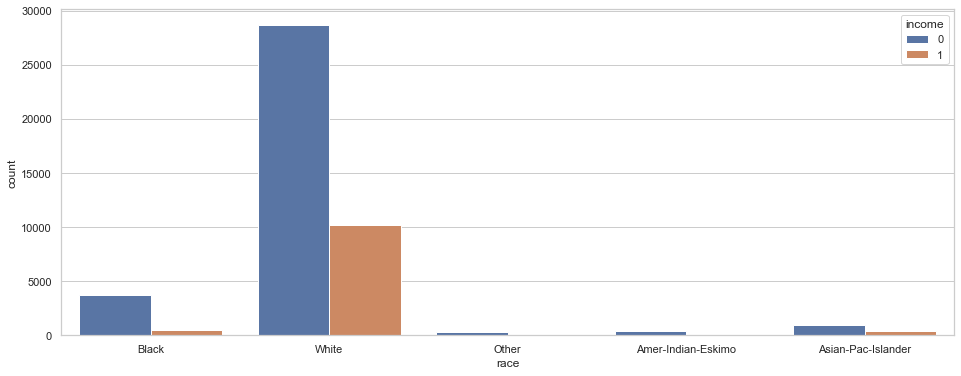

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'race', hue = 'income', data = df);

**The dataset includes majority of information about White race while all other races are lesser in number. I'll combine all other race data into one class as Other.**

In [34]:
df['race'].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [35]:
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [36]:
df['race'].value_counts()

White     38903
 Other     6319
Name: race, dtype: int64

<h5>Gender</h5>

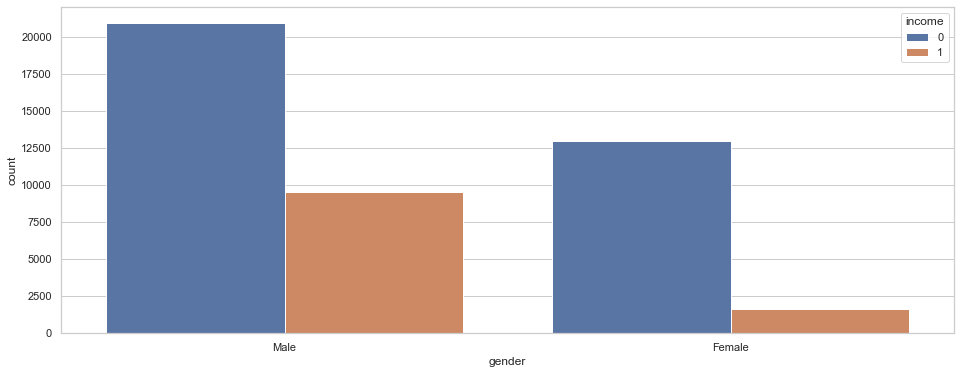

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'gender', hue = 'income', data = df);


**From the plot above, it is clear that**
<ul>
<li>There are more Male participants than Female participants
<li>When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than 50K than Females.

<h5>Country</h5>

In [38]:
country_count = df['country'].value_counts()

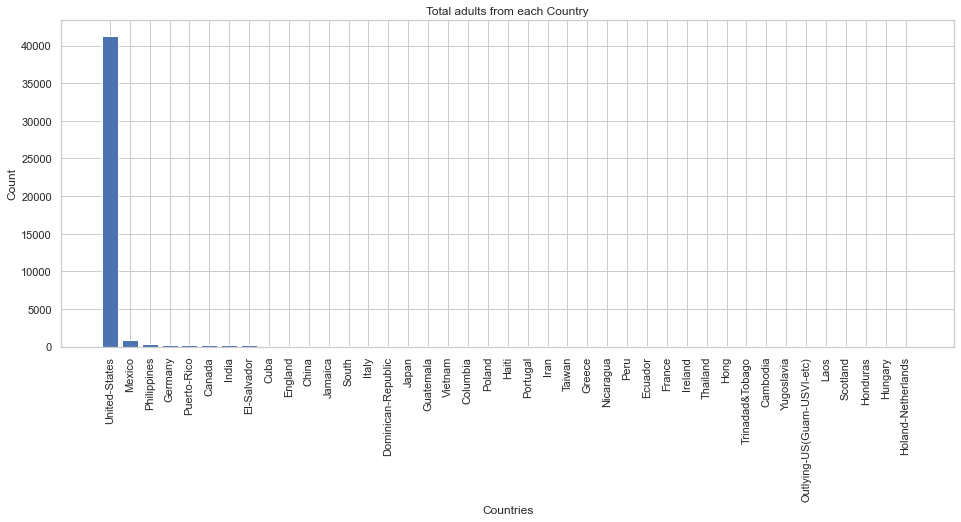

In [39]:
plt.figure(figsize=(16,6))
plt.bar(country_count.index, country_count.values);
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country');

**The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other.**

In [40]:
countries = np.array(df['country'].unique())

In [41]:
countries = np.delete(countries, 0)

In [42]:
df['country'].replace(countries, 'Other', inplace = True)

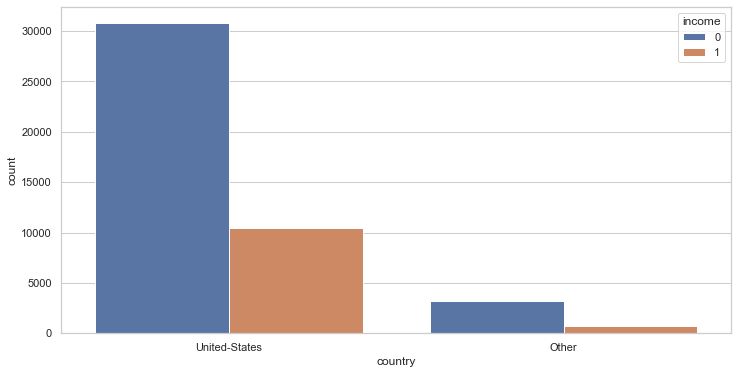

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'country', hue = 'income', data = df);

**The data now appears much better.**

I've analysed all columns. I'll simply convert categorical columns to numerical.